## Populacao e amostragem 
Vamos imaginar, um coleta de dados no centro da cidade,sabe-se, por monitoramento que passam 10000 bikes entre 6am as 18h. Porém nosso estágiario não tem esse tempo e observou apenas 100 bikes.O dado coletado aqui é a velocidade instantane em um determinado ponto...

Média (População): 9.989, Desvio Padrão (População): 4.964, Mediana (População): 9.972
Média (Amostraa): 9.565, Desvio Padrão (Amostra): 4.955,  Mediana (Amostra): 9.441
10 5
724.0


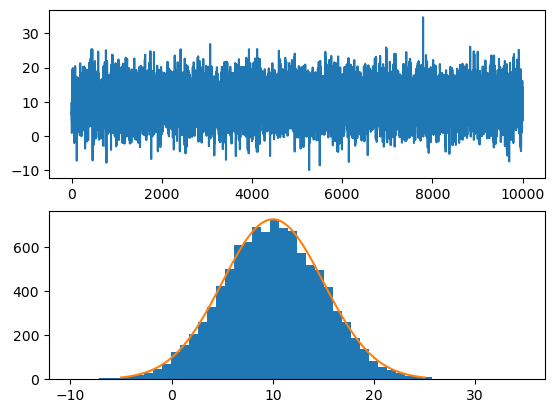

In [1]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
from scipy.stats import norm


mu=10 # média
sig=5# desvio
population = np.random.normal(mu, sig, size=10000);
sample = np.random.choice(population, size=100, replace=False)

print(f"Média (População): {np.mean(population):.3f}, \
Desvio Padrão (População): {np.std(population):.3f}, \
Mediana (População): {np.median(population):.3f}")

print(f"Média (Amostraa): {np.mean(sample):.3f},\
 Desvio Padrão (Amostra): {np.std(sample):.3f}, \
 Mediana (Amostra): {np.median(sample):.3f}")
plt.subplot(2,1,1)
plt.plot(population)
plt.subplot(2,1,2)

yo, xo, _ =plt.hist(population, bins=50);
x = np.linspace(mu-3*sig, mu+3*sig, 10000)

k=1/(sig*np.sqrt(2*ma.pi))
A=max(yo)
#y=k*np.exp(-0.5*((x-mu)/sig)**2)
#ynorm=y/max(y)*A

print(mu,sig)


y=norm.pdf(x,mu,sig)

ynorm=y/max(y)*A

print(max(ynorm))
plt.plot(x,ynorm);



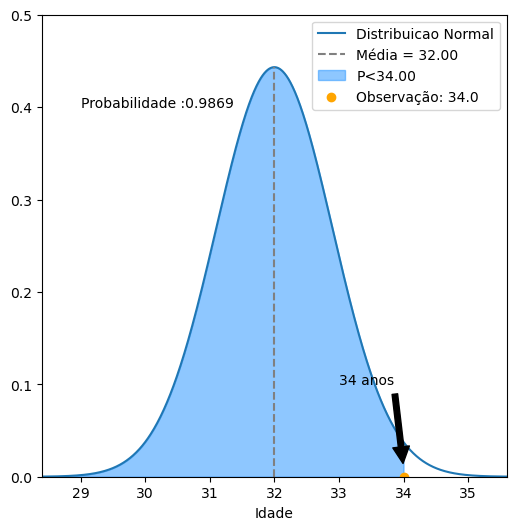

In [2]:
# exemplo2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 

mu=32  #média da populacao
var=0.81 #varianca
sig=np.sqrt(var) #desvio
xo=34        #dado observado (amostra)
probabilidade = round(norm.cdf(xo, mu, sig),4)


x=np.linspace(mu-4*sig,mu+4*sig,1000)
y=norm.pdf(x,mu,sig)
fig, ax = plt.subplots(1, figsize=(6, 6))

ax.plot(x, y, label=f"Distribuicao Normal")
ax.axvline(mu,0,2*max(y),color='gray', linestyle='--', label=f"Média = {mu:.2f}")


condicao=(x<=xo)
ax.fill_between(x,y,where=condicao,color='dodgerblue', alpha=0.5,label=f"P<{xo:.2f}")
ax.scatter(x=xo,y=0,color='orange',label="Observação: {:.1f}".format(xo))

ax.set_xlim([mu-4*sig,mu+4*sig])
ax.set_ylim([0,0.5])

ax.text(29, 0.4, 'Probabilidade :'+str(probabilidade), fontsize=10)  # Texto simples
ax.annotate(str(xo)+' anos', xy=(xo, 0.01), xytext=(xo-1, 0.1),arrowprops=dict(facecolor="black", shrink=0.05)) 

ax.set_xlabel('Idade')
ax.legend()
plt.show()

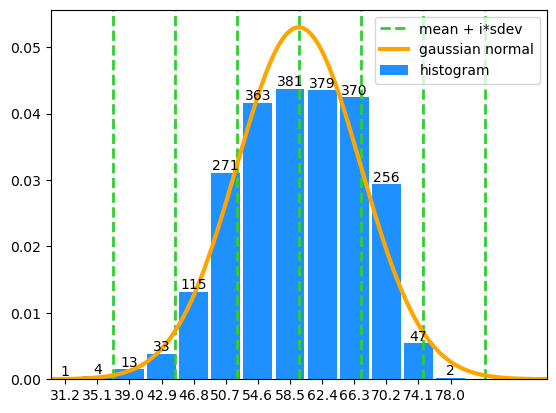

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

l = {31.2: 1, 35.1: 4, 39.0: 13, 42.9: 33, 46.8: 115, 50.7: 271, 54.6: 363, 58.5: 381, 62.4: 379, 66.3: 370, 70.2: 256, 74.1: 47, 78.0: 2}
# convert the dictionary to a list
l_array = np.array( [k for k, v in l.items() for _ in range(v)])


s = sum(l.values())
bin_width = 3.9
bin_centers = list(l.keys())
heights = [v/s/bin_width for v in l.values()]
plt.bar(bin_centers, heights, width=bin_width*0.9, color='dodgerblue', label='histogram')
for c, h, v in zip(bin_centers, heights, l.values()):
    plt.text(c, h, v, ha='center', va='bottom')
plt.xticks(bin_centers)
mean = l_array.mean()
sdev = l_array.std()
for i in range(-3, 4):
    plt.axvline(mean+i*sdev, color='limegreen', ls='--', lw=2, label='mean + i*sdev' if i == 0 else None)

x = np.linspace(mean-4*sdev, mean+4*sdev, 500)
plt.plot(x, norm.pdf(x, mean, sdev), color='orange', lw=3, label='gaussian normal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()